In [1]:
%matplotlib inline
import torch
import numpy as np
from double_net.double_net import DoubleNet
import matplotlib.pyplot as plt

In [2]:
model1 = DoubleNet.load('unit_1x2_0_1_experiment_data/')
model2 = DoubleNet.load('unit_2x3_0_1_experiment_data/')
model1_data = torch.rand(10000, 1, 2)
model2_data = torch.rand(10000, 2, 3)

### Sinkhorn Convergence

First we consider convergence. The plots of relative errors show that there is sometimes around
1% error for agents. Error for items is very low. This is likely because the Sinkhorn update for items occurs last, so right
before returning the final result, we project onto that constraint set.

In [3]:
def plot_convergence(m, testdata):
    relerrs = m.check_convergence(testdata)
    plt.hist(100.0*relerrs[0].numpy())
    plt.title(f"Max pointwise relative error (%), {m.n_agents} agents {m.n_items} items, Agent Constraint")
    plt.show()
    plt.hist(100.0*relerrs[1].numpy())
    plt.title(f"Max pointwise relative error (%), {m.n_agents} agents {m.n_items} items, Item Constraint")


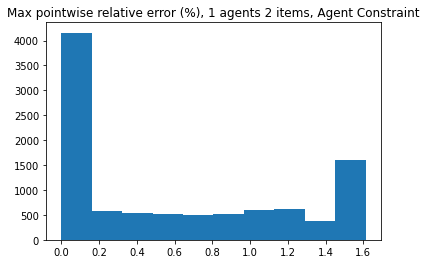

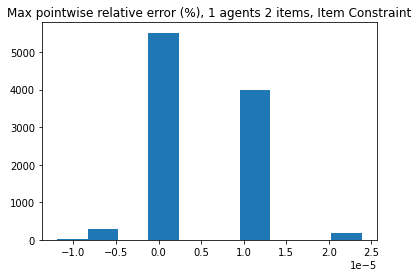

In [4]:
plot_convergence(model1, model1_data)

Similar results for 2 agents, 3 items.

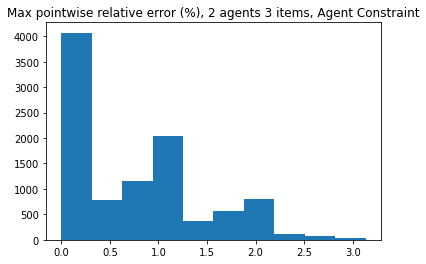

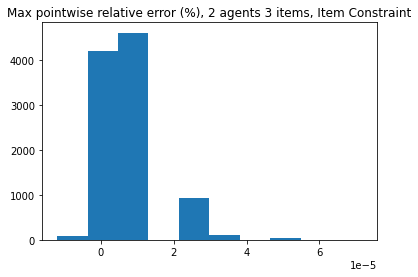

In [5]:
plot_convergence(model2, model2_data)

### Determinism

Now we investigate whether allocations are deterministic. A perfectly deterministic set of samples will be a
perfect step function, flat between 0 and 1.


Below are some examples of what "deterministic" outputs would look like.

Text(0.5, 1.0, 'Perfectly deterministic outputs')

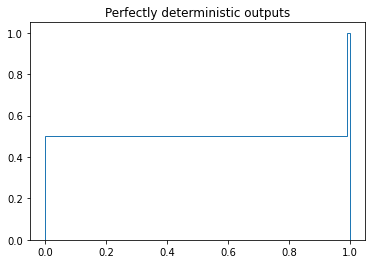

In [6]:
plt.hist(np.random.randint(0,2,10000).astype(float), histtype='step', cumulative=True, density=True, bins=100)
plt.title("Perfectly deterministic outputs")


Text(0.5, 1.0, 'Almost deterministic outputs')

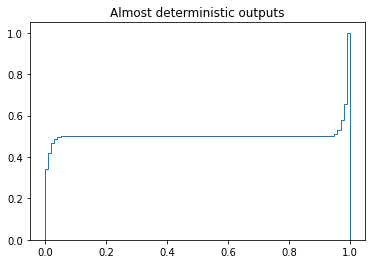

In [7]:
vals = np.concatenate( (np.clip( 1.0 - 0.02 * np.random.randn(10000), a_max=1.0, a_min=0.0), np.clip(0.02*np.random.randn(10000), a_max=1.0, a_min=0.0)))
plt.hist(vals, histtype='step', cumulative=True, density=True, bins=100)
plt.title("Almost deterministic outputs")

Text(0.5, 1.0, 'Almost deterministic outputs, unbalanced')

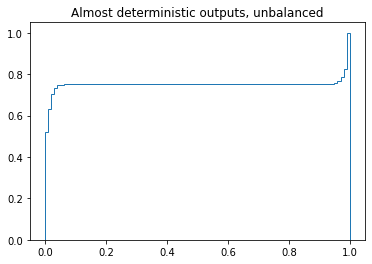

In [8]:
vals = np.concatenate( (np.clip( 1.0 - 0.02 * np.random.randn(5000), a_max=1.0, a_min=0.0), np.clip(0.02*np.random.randn(15000), a_max=1.0, a_min=0.0)))
plt.hist(vals, histtype='step', cumulative=True, density=True, bins=100)
plt.title("Almost deterministic outputs, unbalanced")

In [9]:
def outputs_hist(model, test_data, agent=0):


    output_allocs, output_payments = model(test_data)

    f, axes = plt.subplots(model.n_items, 1, figsize=(6.0,4.0*model.n_items))
    for i in range(model.n_items):
        ax = axes[i]
        im = ax.hist(output_allocs[:, agent, i].cpu().detach().numpy(), histtype='step', cumulative=True, density=True, bins=100)

    # Plot optimals
    f.suptitle(f"{model.n_agents} agents, {model.n_items} items, agent {agent}")
    f.tight_layout()
    f.show()

[6.0, 4.0]

We plot cumulative frequencies of item allocations for each item. These should be quite flat except at 0 and 1.

<ipython-input-9-883811352381>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


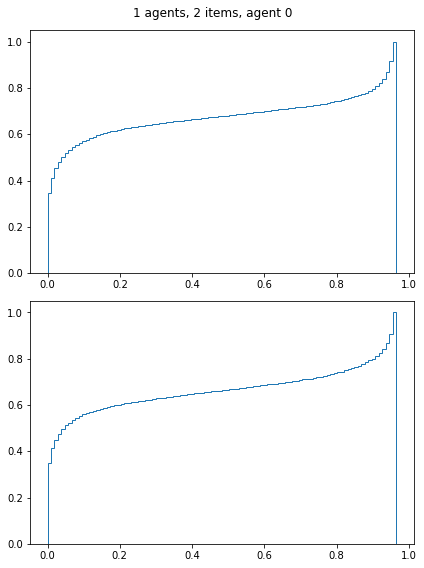

In [10]:
outputs_hist(model1, model1_data, agent=0)

<ipython-input-9-883811352381>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


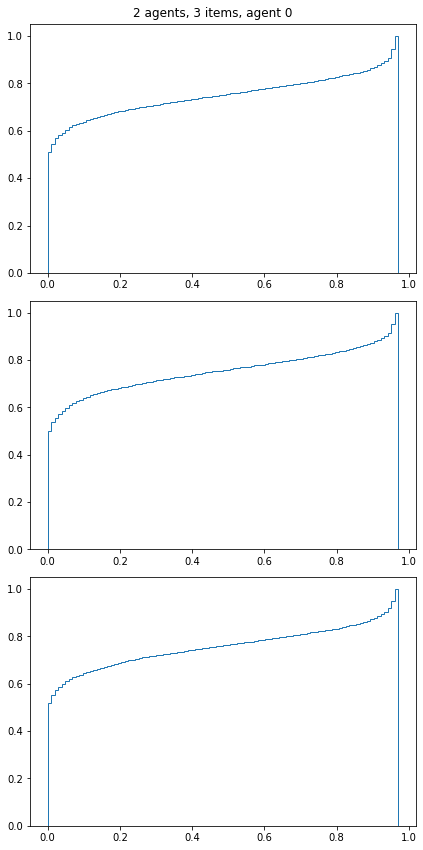

In [11]:
outputs_hist(model2, model2_data, agent=0)

<ipython-input-9-883811352381>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


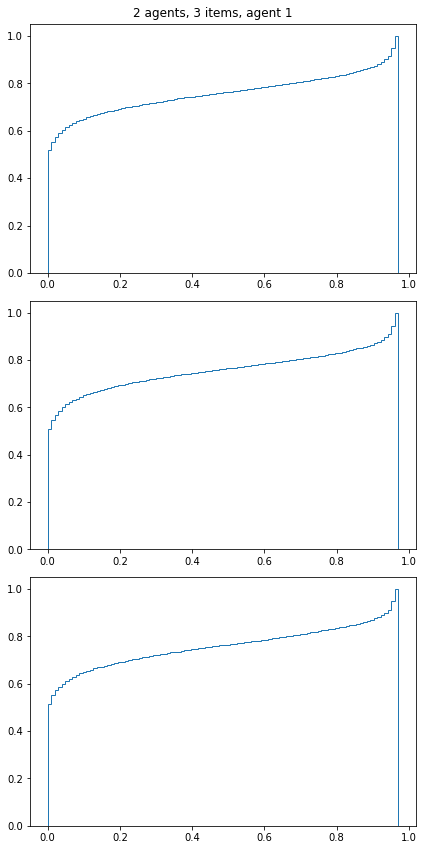

In [12]:
outputs_hist(model2, model2_data, agent=1)

### Decreasing epsilon

What happens if we decrease epsilon? Determinism improves somewhat, but convergence suffers.



In [13]:
model1.sinkhorn_epsilon = 0.005
model2.sinkhorn_epsilon = 0.005

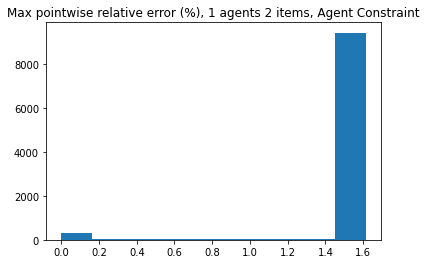

In [14]:
plot_convergence(model1, model1_data)
plt.close()

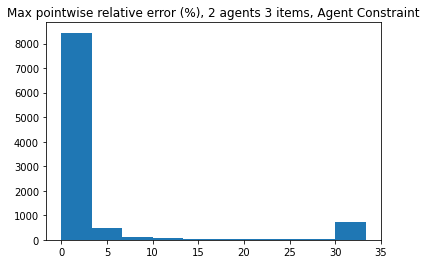

In [15]:
plot_convergence(model2, model2_data)
plt.close()

<ipython-input-9-883811352381>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-9-883811352381>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-9-883811352381>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


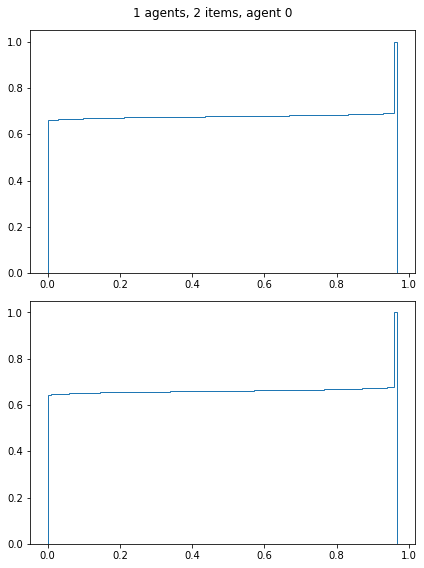

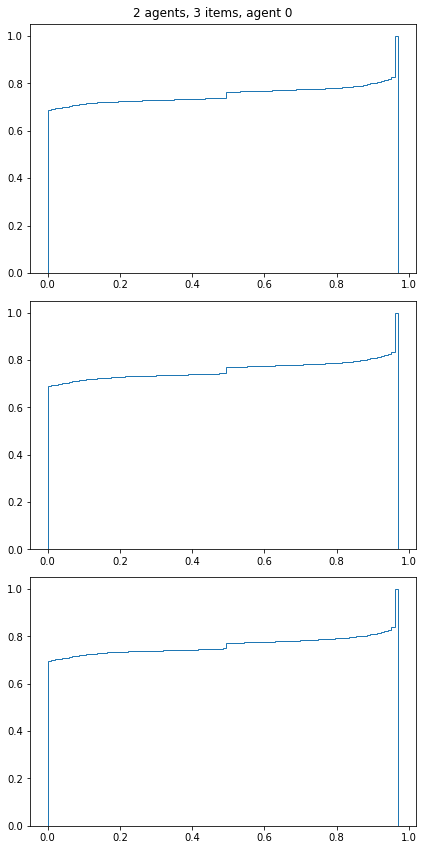

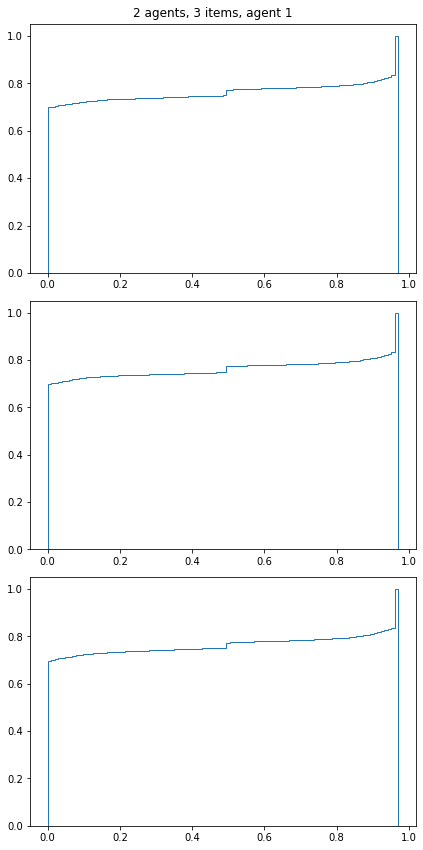

In [16]:
outputs_hist(model1, model1_data, agent=0)
outputs_hist(model2, model2_data, agent=0)
outputs_hist(model2, model2_data, agent=1)

After increasing iterations as well, we get

In [17]:
model1.sinkhorn_rounds = 100
model2.sinkhorn_rounds = 100

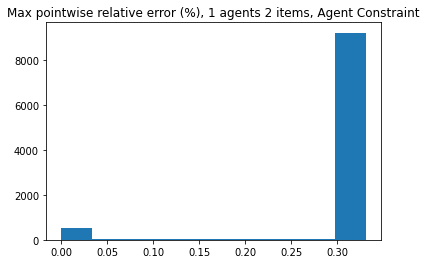

In [18]:
plot_convergence(model1, model1_data)
plt.close()

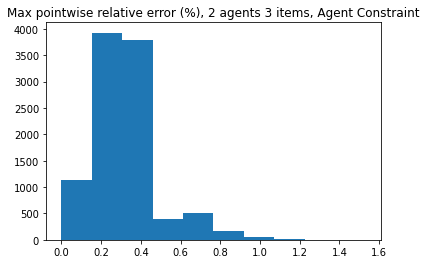

In [19]:
plot_convergence(model2, model2_data)
plt.close()

<ipython-input-9-883811352381>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-9-883811352381>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-9-883811352381>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


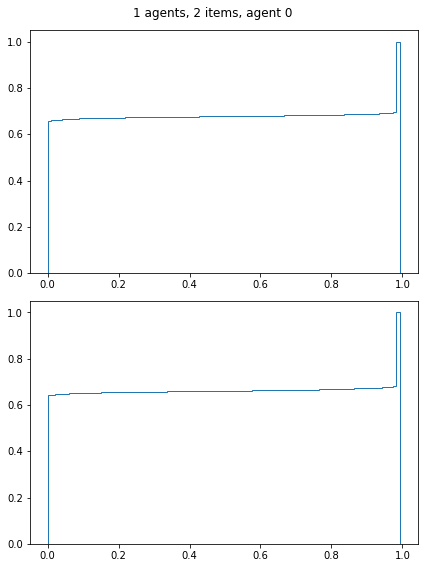

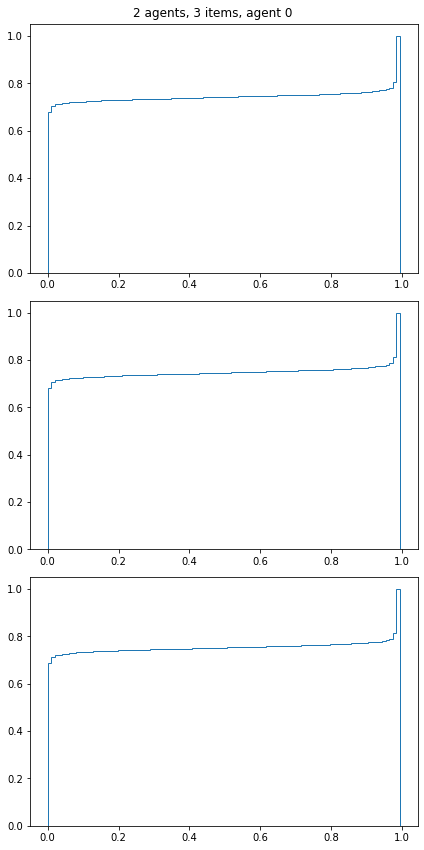

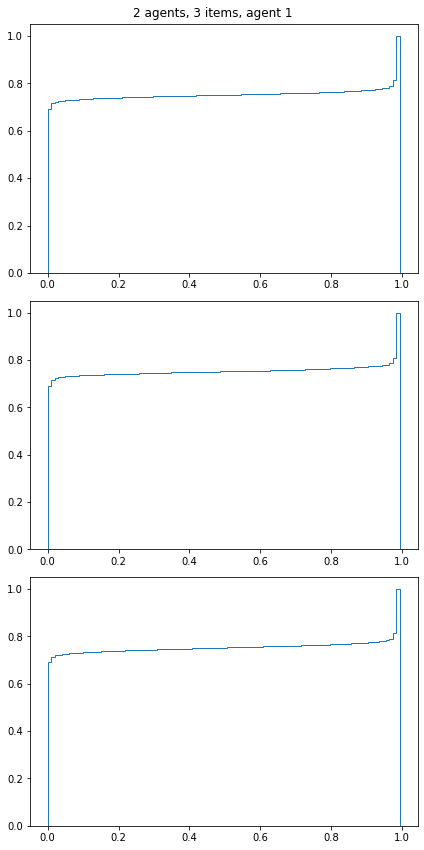

In [20]:
outputs_hist(model1, model1_data, agent=0)
outputs_hist(model2, model2_data, agent=0)
outputs_hist(model2, model2_data, agent=1)
